In [1]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

# Load Data Cube Configuration
import datacube
dc = datacube.Datacube(app = 'my_app',config = '/etc/datacube.conf')

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np  
import xarray as xr  

# Import Data Cube API
#import utils.data_cube_utilities.data_access_api as dc_api  
#api = dc_api.DataAccessApi()

In [2]:
product = 'landsat_sr_kenya'
platform = "LANDSAT_8"

output_crs = 'EPSG:4326'
resolution = (-0.00027, 0.00027)
lat_range = (-0.5239, -0.2657)
lon_range = (36.2581, 35.982)
time_range = ('2020-01-01','2020-12-31')

In [3]:
query={'product':product,
       'x':lon_range,
       'y':lat_range,
       'time':time_range,
       'output_crs':output_crs,
       'resolution':resolution,
}
       

In [4]:
landsat_dataset = dc.load(**query)

In [5]:
print(landsat_dataset)

<xarray.Dataset>
Dimensions:        (time: 37, latitude: 957, longitude: 1024)
Coordinates:
  * time           (time) datetime64[ns] 2020-03-14T07:48:49.984619 ... 2020-...
  * latitude       (latitude) float64 -0.2658 -0.2661 ... -0.5237 -0.5239
  * longitude      (longitude) float64 35.98 35.98 35.98 ... 36.26 36.26 36.26
    spatial_ref    int32 4326
Data variables:
    sr_b1          (time, latitude, longitude) uint16 7891 7936 8175 ... 0 0 0
    sr_b2          (time, latitude, longitude) uint16 8159 8296 8510 ... 0 0 0
    sr_b3          (time, latitude, longitude) uint16 9539 9877 10005 ... 0 0 0
    sr_b4          (time, latitude, longitude) uint16 9052 9400 9530 ... 0 0 0
    sr_b5          (time, latitude, longitude) uint16 20854 21311 20983 ... 0 0
    sr_b6          (time, latitude, longitude) uint16 14245 15061 15405 ... 0 0
    sr_b7          (time, latitude, longitude) uint16 10746 11163 11385 ... 0 0
    qa_pixel       (time, latitude, longitude) uint16 21824 21824 21824

In [9]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)

ModuleNotFoundError: No module named 'utils.data_cube_utilities'

In [10]:
from utils.dea_tools.plotting import display_map,rgb

rgb(ds,bands=['red','green','blue'],index=1,robust=True)

ModuleNotFoundError: No module named 'utils.dea_tools'

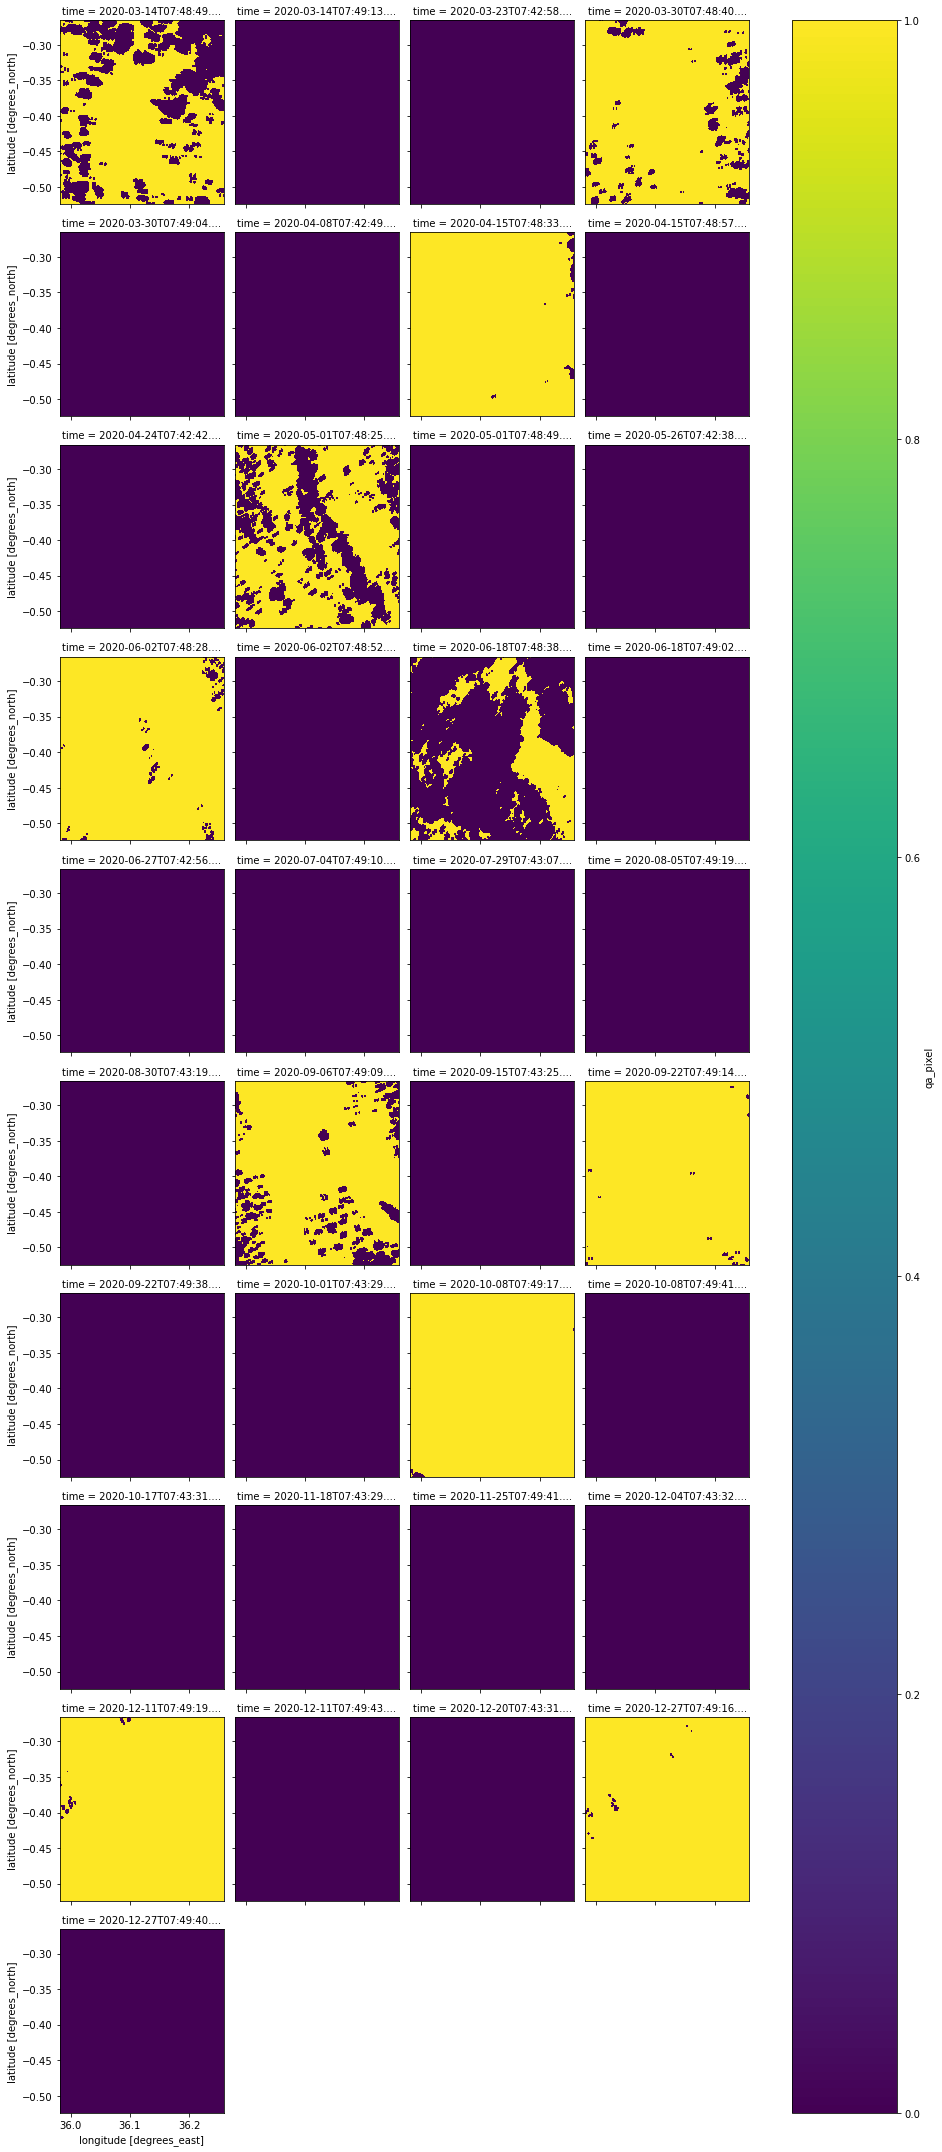

In [11]:
from datacube.utils.masking import make_mask
from datacube.utils.masking import mask_invalid_data

# Create the mask based on clear is true -- you can see the flags above
clear_mask = make_mask(landsat_dataset.qa_pixel, clear=True,cloud_shadow='not_high_confidence',cloud='not_high_confidence')
clear_mask.plot(col="time", col_wrap=4)

In [32]:
import matplotlib.pyplot as plt
from utils.dea_tools.plotting import display_map, rgb

# Apply the mask
cleaned_dataset = landsat_dataset.where(clear_mask)

# Set the band combination to plot
bands = ["red", "green", "blue"]

ModuleNotFoundError: No module named 'utils.dea_tools'

In [30]:
from utils.data_cube_utilities.dc_mosaic import create_hdmedians_multiple_band_mosaic
geomedian_composite = create_hdmedians_multiple_band_mosaic(cleaned_dataset, clear_mask)
geomedian_composite

ModuleNotFoundError: No module named 'utils.data_cube_utilities'

In [31]:
import matplotlib.pyplot as plt
bands=['red','green','blue']
rgb(geomedian_composite, bands=bands)
plt.show()

NameError: name 'rgb' is not defined